In [11]:
%matplotlib inline
import os
from matplotlib import ticker

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
umachine_sdss, is_complete, good_profile_mask = load_umachine_sdss_with_meert15()

mask = is_complete & good_profile_mask
sdss = umachine_sdss[mask]
print("Number of M*-complete SDSS galaxies with good profile measurements = {0}".format(len(sdss)))

completeness_table_dirname = "/Users/aphearin/Dropbox/UniverseMachine/data/sdss"
completeness_table = np.loadtxt(os.path.join(completeness_table_dirname, 'completeness.dat'))
completeness_dict = {}
for i, sm in enumerate(completeness_table[:, 0]):
    smkey = "{0:.2f}".format(sm)
    completeness_dict[smkey] = completeness_table[i, 1]

Number of M*-complete SDSS galaxies with good profile measurements = 229889


In [3]:
from galsize_models.measurements.split_sdss_sample_rhalf import sdss_sample_below_median_size

sm9p75_mask = (sdss['sm'] > 9.75) & (sdss['z'] < completeness_dict['9.75'])
sm10p0_mask = sdss['sm'] > 10 & (sdss['z'] < completeness_dict['10.00'])
sm10p25_mask = (sdss['sm'] > 10.25) & (sdss['z'] < completeness_dict['10.25'])
sm10p5_mask = (sdss['sm'] > 10.5) & (sdss['z'] < completeness_dict['10.45'])
sm10p75_mask = (sdss['sm'] > 10.75) & (sdss['z'] < completeness_dict['10.75'])
sm11p0_mask = (sdss['sm'] > 11) & (sdss['z'] < completeness_dict['11.00'])
sm11p25_mask = (sdss['sm'] > 11.25) & (sdss['z'] < completeness_dict['11.20'])

sdss_sm9p75 = sdss[sm9p75_mask]
sdss_sm10p0 = sdss[sm10p0_mask]
sdss_sm10p25 = sdss[sm10p25_mask]
sdss_sm10p5 = sdss[sm10p5_mask]
sdss_sm10p75 = sdss[sm10p75_mask]
sdss_sm11p0 = sdss[sm11p0_mask]
sdss_sm11p25 = sdss[sm11p25_mask]

print("{0:.2f}".format(sdss_sm9p75['sm'].min()))
print("{0:.2f}".format(sdss_sm10p0['sm'].min()))
print("{0:.2f}".format(sdss_sm10p25['sm'].min()))
print("{0:.2f}".format(sdss_sm10p5['sm'].min()))
print("{0:.2f}".format(sdss_sm10p75['sm'].min()))
print("{0:.2f}".format(sdss_sm11p0['sm'].min()))
print("{0:.2f}".format(sdss_sm11p25['sm'].min()))


sdss_sm9p75['small'] = sdss_sample_below_median_size(sdss_sm9p75)
sdss_sm9p75_small = sdss_sm9p75[sdss_sm9p75['small']]
sdss_sm9p75_large = sdss_sm9p75[~sdss_sm9p75['small']]

sdss_sm10p0['small'] = sdss_sample_below_median_size(sdss_sm10p0)
sdss_sm10p0_small = sdss_sm10p0[sdss_sm10p0['small']]
sdss_sm10p0_large = sdss_sm10p0[~sdss_sm10p0['small']]

sdss_sm10p25['small'] = sdss_sample_below_median_size(sdss_sm10p25)
sdss_sm10p25_small = sdss_sm10p25[sdss_sm10p25['small']]
sdss_sm10p25_large = sdss_sm10p25[~sdss_sm10p25['small']]

sdss_sm10p5['small'] = sdss_sample_below_median_size(sdss_sm10p5)
sdss_sm10p5_small = sdss_sm10p5[sdss_sm10p5['small']]
sdss_sm10p5_large = sdss_sm10p5[~sdss_sm10p5['small']]

sdss_sm10p75['small'] = sdss_sample_below_median_size(sdss_sm10p75)
sdss_sm10p75_small = sdss_sm10p75[sdss_sm10p75['small']]
sdss_sm10p75_large = sdss_sm10p75[~sdss_sm10p75['small']]

sdss_sm11p0['small'] = sdss_sample_below_median_size(sdss_sm11p0)
sdss_sm11p0_small = sdss_sm11p0[sdss_sm11p0['small']]
sdss_sm11p0_large = sdss_sm11p0[~sdss_sm11p0['small']]

sdss_sm11p25['small'] = sdss_sample_below_median_size(sdss_sm11p25)
sdss_sm11p25_small = sdss_sm11p25[sdss_sm11p25['small']]
sdss_sm11p25_large = sdss_sm11p25[~sdss_sm11p25['small']]


9.75
6.00
10.25
10.50
10.75
11.00
11.25


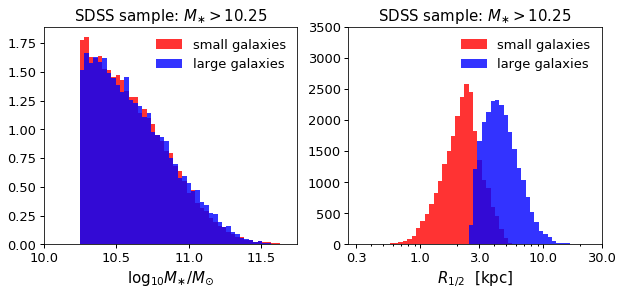

In [19]:
sm_min = 10.25
small, large = sdss_sm10p25_small, sdss_sm10p25_large
sm_bins = np.linspace(sm_min, 11.75, 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
xscale2 = ax2.set_xscale('log')

xlim1 = ax1.set_xlim(10, 11.75)
ylim2 = ax2.set_ylim(0, 3500)

__=ax1.hist(small['sm'], bins=sm_bins, normed=True, alpha=0.8, 
            label='small galaxies', color='red')
__=ax1.hist(large['sm'], bins=sm_bins, normed=True, alpha=0.8, 
            label='large galaxies', color='blue')

r50_bins = np.logspace(-0.5, 1.25, 50)
__=ax2.hist(small['r50_magr_kpc_meert15'], bins=r50_bins, alpha=0.8, 
           label='small galaxies', color='red')
__=ax2.hist(large['r50_magr_kpc_meert15'], bins=r50_bins, alpha=0.8, 
           label='large galaxies', color='blue')

__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.set_xticks((0.3, 1, 3, 10, 30))

title1 = ax1.set_title(r'SDSS sample: $M_{\ast}>10.25$')
title2 = ax2.set_title(r'SDSS sample: $M_{\ast}>10.25$')
xlabel1 = ax1.set_xlabel(r'$\log_{10}M_{\ast}/M_{\odot}$')
xlabel2 = ax2.set_xlabel(r'$R_{1/2}$  $[{\rm kpc}]$')

legend1 = ax1.legend()
legend2 = ax2.legend()

figname = 'sdss_small_large_sample_definitions.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel1], bbox_inches='tight')

In [5]:
print(small.keys())

['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'logsm_bell03_meert15', 'ssfr', 'small']


In [6]:
from galsize_models.measurements.measure_sdss_clustering import save_wp_measurement

import os
repo_dirname = "/Users/aphearin/work/repositories/python/galsize_models"
output_subdirname = "galsize_models/measurements/data/two_point_functions"
output_dirname = os.path.join(repo_dirname, output_subdirname)

sm_high = 12


In [7]:
save_wp_measurement(sdss_sm9p75, output_dirname, 'sdss_mpajhu_sm9p75', 9.75, sm_high)

save_wp_measurement(sdss_sm10p0, output_dirname, 'sdss_mpajhu_sm10p0', 10., sm_high)
save_wp_measurement(sdss_sm10p25, output_dirname, 'sdss_mpajhu_sm10p25', 10.25, sm_high)
save_wp_measurement(sdss_sm10p5, output_dirname, 'sdss_mpajhu_sm10p5', 10.5, sm_high)
save_wp_measurement(sdss_sm10p75, output_dirname, 'sdss_mpajhu_sm10p75', 10.75, sm_high)

save_wp_measurement(sdss_sm11p0, output_dirname, 'sdss_mpajhu_sm11p0', 11., sm_high)
save_wp_measurement(sdss_sm11p25, output_dirname, 'sdss_mpajhu_sm11p25', 11.25, sm_high)


Measuring wp for sdss_mpajhu_sm9p75 sample of 27658 galaxies
Measuring wp for sdss_mpajhu_sm10p0 sample of 229889 galaxies
Measuring wp for sdss_mpajhu_sm10p25 sample of 48571 galaxies
Measuring wp for sdss_mpajhu_sm10p5 sample of 52167 galaxies
Measuring wp for sdss_mpajhu_sm10p75 sample of 52350 galaxies
Measuring wp for sdss_mpajhu_sm11p0 sample of 33578 galaxies
Measuring wp for sdss_mpajhu_sm11p25 sample of 12645 galaxies


In [8]:
save_wp_measurement(sdss_sm9p75_small, output_dirname, 'sdss_mpajhu_sm9p75_small', 9.75, sm_high)

save_wp_measurement(sdss_sm10p0_small, output_dirname, 'sdss_mpajhu_sm10p0_small', 10., sm_high)
save_wp_measurement(sdss_sm10p25_small, output_dirname, 'sdss_mpajhu_sm10p25_small', 10.25, sm_high)
save_wp_measurement(sdss_sm10p5_small, output_dirname, 'sdss_mpajhu_sm10p5_small', 10.5, sm_high)
save_wp_measurement(sdss_sm10p75_small, output_dirname, 'sdss_mpajhu_sm10p75_small', 10.75, sm_high)

save_wp_measurement(sdss_sm11p0_small, output_dirname, 'sdss_mpajhu_sm11p0_small', 11., sm_high)
save_wp_measurement(sdss_sm11p25_small, output_dirname, 'sdss_mpajhu_sm11p25_small', 11.25, sm_high)


Measuring wp for sdss_mpajhu_sm9p75_small sample of 13852 galaxies
Measuring wp for sdss_mpajhu_sm10p0_small sample of 120751 galaxies
Measuring wp for sdss_mpajhu_sm10p25_small sample of 24487 galaxies
Measuring wp for sdss_mpajhu_sm10p5_small sample of 26413 galaxies
Measuring wp for sdss_mpajhu_sm10p75_small sample of 26574 galaxies
Measuring wp for sdss_mpajhu_sm11p0_small sample of 17073 galaxies
Measuring wp for sdss_mpajhu_sm11p25_small sample of 6411 galaxies


In [9]:
save_wp_measurement(sdss_sm9p75_large, output_dirname, 'sdss_mpajhu_sm9p75_large', 9.75, sm_high)

save_wp_measurement(sdss_sm10p0_large, output_dirname, 'sdss_mpajhu_sm10p0_large', 10., sm_high)
save_wp_measurement(sdss_sm10p25_large, output_dirname, 'sdss_mpajhu_sm10p25_large', 10.25, sm_high)
save_wp_measurement(sdss_sm10p5_large, output_dirname, 'sdss_mpajhu_sm10p5_large', 10.5, sm_high)
save_wp_measurement(sdss_sm10p75_large, output_dirname, 'sdss_mpajhu_sm10p75_large', 10.75, sm_high)

save_wp_measurement(sdss_sm11p0_large, output_dirname, 'sdss_mpajhu_sm11p0_large', 11., sm_high)
save_wp_measurement(sdss_sm11p25_large, output_dirname, 'sdss_mpajhu_sm11p25_large', 11.25, sm_high)


Measuring wp for sdss_mpajhu_sm9p75_large sample of 13806 galaxies
Measuring wp for sdss_mpajhu_sm10p0_large sample of 109138 galaxies
Measuring wp for sdss_mpajhu_sm10p25_large sample of 24084 galaxies
Measuring wp for sdss_mpajhu_sm10p5_large sample of 25754 galaxies
Measuring wp for sdss_mpajhu_sm10p75_large sample of 25776 galaxies
Measuring wp for sdss_mpajhu_sm11p0_large sample of 16505 galaxies
Measuring wp for sdss_mpajhu_sm11p25_large sample of 6234 galaxies
